In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
df_glove = pd.read_csv("GloVe/Final_Results.csv")
df_google_w2v = pd.read_csv("GoogleW2V/Final_Results.csv")
df_trained_w2v = pd.read_csv("TrainedW2V/Final_Results.csv")
df_bert = pd.read_csv("BERT/Final_Results.csv")

# Results of GloVe+LSTM model

In [3]:
df_glove

,Coder,Train_Accuracy,Val_Accuracy,Test_Accuracy,#TestData,#AllData
0,Binary_Classification,0.706972,0.894231,0.682927,123,634
1,Sally,0.890370,0.910256,0.621212,66,317
2,Trixy,0.808934,0.800000,0.464789,71,395
3,Frenard,0.820666,0.817647,0.430380,79,413
4,Sally_Trixy_Agree,0.922000,0.833333,0.531250,32,144
5,Sally_Frenard_Agree,0.904000,0.666667,0.571429,14,70
6,Sally_Trixy_DisAgree,0.958333,0.571429,0.764706,17,84
7,Sally_Frenard_DisAgree,0.896739,0.916667,0.800000,10,62
8,Trixy_Sally_DisAgree,0.852525,0.800000,0.375000,24,134
9,Frenard_Sally_DisAgree,0.883673,0.818182,0.500000,24,133


# Results of GoogleW2V+LSTM model

In [4]:
df_google_w2v

,Coder,Train_Accuracy,Val_Accuracy,Test_Accuracy,#TestData,#AllData
0,Binary_Classification,0.772321,0.860000,0.691176,136,634
1,Sally,0.855111,0.840000,0.626866,67,317
2,Trixy,0.848302,0.833333,0.440000,100,395
3,Frenard,0.904207,0.828571,0.376812,69,413
4,Sally_Trixy_Agree,0.950943,0.883333,0.538462,26,144
5,Sally_Frenard_Agree,0.954717,0.766667,0.727273,11,70
6,Sally_Trixy_DisAgree,1.000000,0.714286,0.611111,18,84
7,Sally_Frenard_DisAgree,0.958333,0.950000,0.866667,15,62
8,Trixy_Sally_DisAgree,0.934043,0.800000,0.655172,29,134
9,Frenard_Sally_DisAgree,0.894737,0.836364,0.296296,27,133


# Results of TrainedW2V+LSTM model

In [5]:
df_trained_w2v

,Coder,Train_Accuracy,Val_Accuracy,Test_Accuracy,#TestData,#AllData
0,Binary_Classification,0.790466,0.852941,0.643939,132,634
1,Sally,0.946226,0.850000,0.604938,81,317
2,Trixy,0.888571,0.875000,0.530120,83,395
3,Frenard,0.866894,0.824242,0.448276,87,413
4,Sally_Trixy_Agree,0.925455,0.769231,0.523810,21,144
5,Sally_Frenard_Agree,0.938776,0.866667,0.666667,15,70
6,Sally_Trixy_DisAgree,0.989071,0.809524,0.937500,16,84
7,Sally_Frenard_DisAgree,0.988889,0.800000,0.750000,12,62
8,Trixy_Sally_DisAgree,0.954000,0.833333,0.409091,22,134
9,Frenard_Sally_DisAgree,0.943158,0.800000,0.185185,27,133


# Results of BERT model

In [6]:
df_bert

,Coder,Train_Accuracy,Val_Accuracy,Test_Accuracy,#TestData,#AllData
0,Binary_Classification,NaN,0.877551,0.911565,147,634
1,Sally,NaN,0.807692,0.786885,61,317
2,Trixy,NaN,0.553846,0.625000,72,395
3,Frenard,NaN,0.485294,0.447368,76,413
4,Sally_Trixy_Agree,NaN,0.782609,0.750000,32,144
5,Sally_Frenard_Agree,NaN,0.666667,0.461538,13,70
6,Sally_Trixy_DisAgree,NaN,0.769231,0.900000,20,84
7,Sally_Frenard_DisAgree,NaN,0.900000,0.857143,14,62
8,Trixy_Sally_DisAgree,NaN,0.571429,0.531250,32,134
9,Frenard_Sally_DisAgree,NaN,0.363636,0.541667,24,133


In [7]:
list_models = ['Glove', 'Google_W2V', 'Trained_W2V', 'BERT']

# Results of Binary Classification

### For Binary Classification, we are classifying sentences as Useless (U) and Usefull or Non-Useless (N). We have considered Sally's 317 Usefull sentences and have taken an equal no. of 317 Useless sentences as the Dataset.

In [8]:
df_binary = pd.DataFrame()
df_binary = pd.concat([df_binary,df_glove.iloc[:1]])
df_binary = pd.concat([df_binary,df_google_w2v.iloc[:1]])
df_binary = pd.concat([df_binary,df_trained_w2v.iloc[:1]])
df_binary = pd.concat([df_binary,df_bert.iloc[:1]])
df_binary['Coder'] = list_models
df_binary.rename(columns = {'Coder':'Models'}, inplace = True) 
df_binary

,Models,Train_Accuracy,Val_Accuracy,Test_Accuracy,#TestData,#AllData
0,Glove,0.706972,0.894231,0.682927,123,634
0,Google_W2V,0.772321,0.860000,0.691176,136,634
0,Trained_W2V,0.790466,0.852941,0.643939,132,634
0,BERT,NaN,0.877551,0.911565,147,634


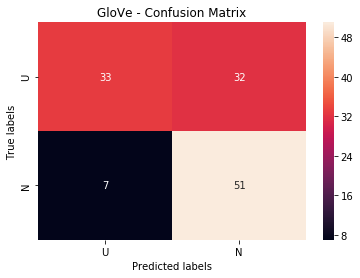

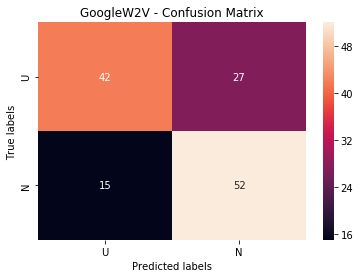

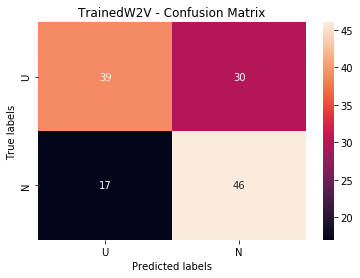

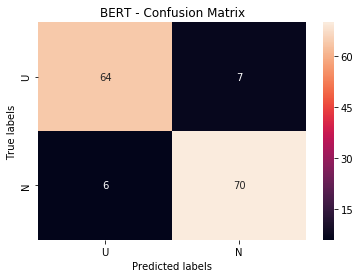

In [9]:
# Confusion Matrix Plot for GloVe
plt.figure(1)
df_cm = pd.read_csv("GloVe/Binary_Classification.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GloVe - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for GoogleW2V
plt.figure(2)
df_cm = pd.read_csv("GoogleW2V/Binary_Classification.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GoogleW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for TrainedW2V
plt.figure(3)
df_cm = pd.read_csv("TrainedW2V/Binary_Classification.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('TrainedW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

# Confusion Matrix Plot for BERT
plt.figure(4)
df_cm = pd.read_csv("BERT/Binary_Classification.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('BERT - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

# Results of Sentence Classification

## 1. Sally

### In this case, we have taken all the usefull sentences labelled by Sally.

In [10]:
df_sally = pd.DataFrame()
df_sally = pd.concat([df_sally,df_glove.iloc[1:2,:8]])
df_sally = pd.concat([df_sally,df_google_w2v.iloc[1:2,:8]])
df_sally = pd.concat([df_sally,df_trained_w2v.iloc[1:2,:8]])
df_sally = pd.concat([df_sally,df_bert.iloc[1:2,:8]])
df_sally['Coder'] = list_models
df_sally.rename(columns = {'Coder':'Models'}, inplace = True) 
df_sally

,Models,Train_Accuracy,Val_Accuracy,Test_Accuracy,#TestData,#AllData
1,Glove,0.890370,0.910256,0.621212,66,317
1,Google_W2V,0.855111,0.840000,0.626866,67,317
1,Trained_W2V,0.946226,0.850000,0.604938,81,317
1,BERT,NaN,0.807692,0.786885,61,317


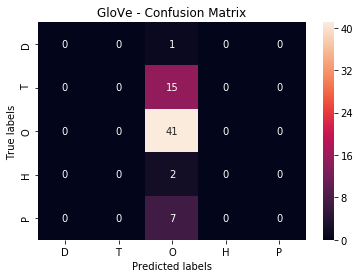

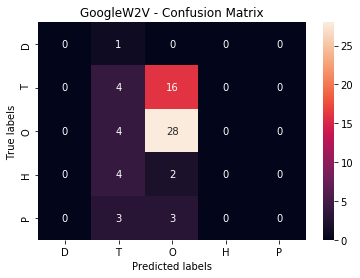

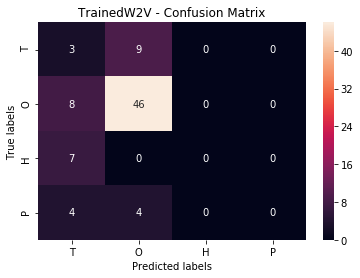

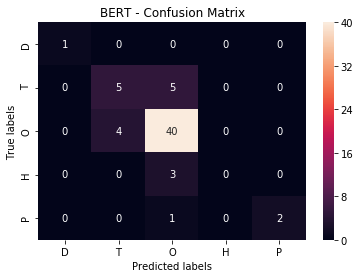

In [11]:
# Confusion Matrix Plot for GloVe
plt.figure(1)
df_cm = pd.read_csv("GloVe/Sally.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GloVe - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for GoogleW2V
plt.figure(2)
df_cm = pd.read_csv("GoogleW2V/Sally.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GoogleW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for TrainedW2V
plt.figure(3)
df_cm = pd.read_csv("TrainedW2V/Sally.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('TrainedW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

# Confusion Matrix Plot for BERT
plt.figure(4)
df_cm = pd.read_csv("BERT/Sally.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('BERT - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

## 2. Trixy

### In this case, we have taken all the usefull sentences labelled by Trixy.

In [12]:
df_trixy = pd.DataFrame()
df_trixy = pd.concat([df_trixy,df_glove.iloc[2:3,:8]])
df_trixy = pd.concat([df_trixy,df_google_w2v.iloc[2:3,:8]])
df_trixy = pd.concat([df_trixy,df_trained_w2v.iloc[2:3,:8]])
df_trixy = pd.concat([df_trixy,df_bert.iloc[2:3,:8]])
df_trixy['Coder'] = list_models
df_trixy.rename(columns = {'Coder':'Models'}, inplace = True) 
df_trixy

,Models,Train_Accuracy,Val_Accuracy,Test_Accuracy,#TestData,#AllData
2,Glove,0.808934,0.800000,0.464789,71,395
2,Google_W2V,0.848302,0.833333,0.440000,100,395
2,Trained_W2V,0.888571,0.875000,0.530120,83,395
2,BERT,NaN,0.553846,0.625000,72,395


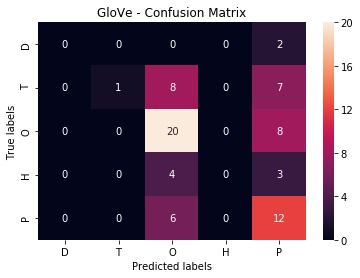

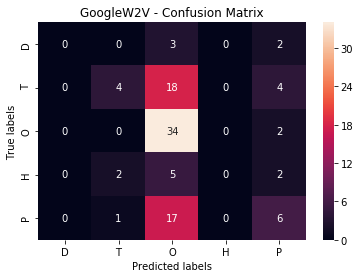

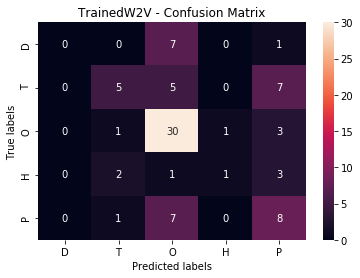

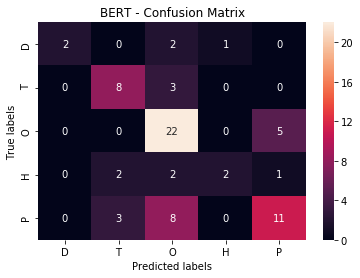

In [13]:
# Confusion Matrix Plot for GloVe
plt.figure(1)
df_cm = pd.read_csv("GloVe/Trixy.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GloVe - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for GoogleW2V
plt.figure(2)
df_cm = pd.read_csv("GoogleW2V/Trixy.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GoogleW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for TrainedW2V
plt.figure(3)
df_cm = pd.read_csv("TrainedW2V/Trixy.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('TrainedW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

# Confusion Matrix Plot for BERT
plt.figure(4)
df_cm = pd.read_csv("BERT/Trixy.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('BERT - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

## 3. Frenard

### In this case, we have taken all the usefull sentences labelled by Frenard.

In [14]:
df_frenard = pd.DataFrame()
df_frenard = pd.concat([df_frenard,df_glove.iloc[3:4,:8]])
df_frenard = pd.concat([df_frenard,df_google_w2v.iloc[3:4,:8]])
df_frenard = pd.concat([df_frenard,df_trained_w2v.iloc[3:4,:8]])
df_frenard = pd.concat([df_frenard,df_bert.iloc[3:4,:8]])
df_frenard['Coder'] = list_models
df_frenard.rename(columns = {'Coder':'Models'}, inplace = True) 
df_frenard

,Models,Train_Accuracy,Val_Accuracy,Test_Accuracy,#TestData,#AllData
3,Glove,0.820666,0.817647,0.430380,79,413
3,Google_W2V,0.904207,0.828571,0.376812,69,413
3,Trained_W2V,0.866894,0.824242,0.448276,87,413
3,BERT,NaN,0.485294,0.447368,76,413


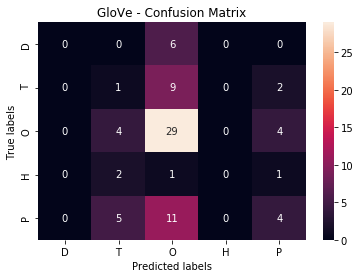

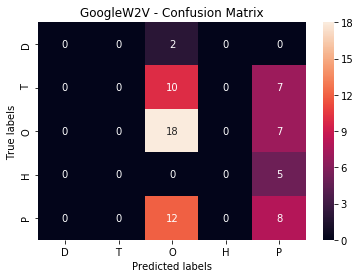

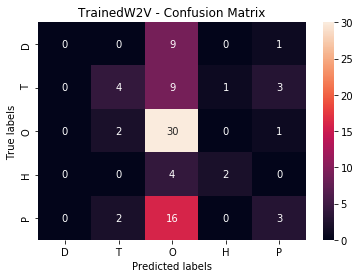

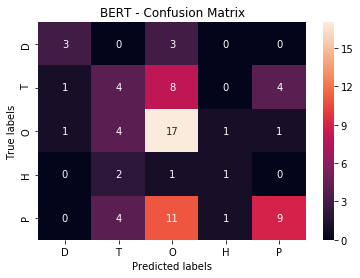

In [15]:
# Confusion Matrix Plot for GloVe
plt.figure(1)
df_cm = pd.read_csv("GloVe/Frenard.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GloVe - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for GoogleW2V
plt.figure(2)
df_cm = pd.read_csv("GoogleW2V/Frenard.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GoogleW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for TrainedW2V
plt.figure(3)
df_cm = pd.read_csv("TrainedW2V/Frenard.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('TrainedW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

# Confusion Matrix Plot for BERT
plt.figure(4)
df_cm = pd.read_csv("BERT/Frenard.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('BERT - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

## 4. Sally and Trixy Agree

### In this case, we have taken all the usefull sentences labelled by Sally and Trixy, where they agree.

In [16]:
df_sallytrixy_agree = pd.DataFrame()
df_sallytrixy_agree = pd.concat([df_sallytrixy_agree,df_glove.iloc[4:5,:8]])
df_sallytrixy_agree = pd.concat([df_sallytrixy_agree,df_google_w2v.iloc[4:5,:8]])
df_sallytrixy_agree = pd.concat([df_sallytrixy_agree,df_trained_w2v.iloc[4:5,:8]])
df_sallytrixy_agree = pd.concat([df_sallytrixy_agree,df_bert.iloc[4:5,:8]])
df_sallytrixy_agree['Coder'] = list_models
df_sallytrixy_agree.rename(columns = {'Coder':'Models'}, inplace = True) 
df_sallytrixy_agree

,Models,Train_Accuracy,Val_Accuracy,Test_Accuracy,#TestData,#AllData
4,Glove,0.922000,0.833333,0.531250,32,144
4,Google_W2V,0.950943,0.883333,0.538462,26,144
4,Trained_W2V,0.925455,0.769231,0.523810,21,144
4,BERT,NaN,0.782609,0.750000,32,144


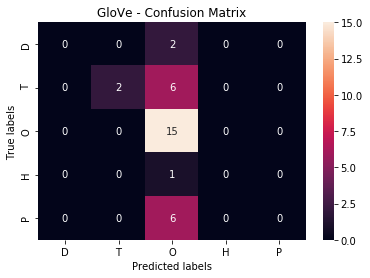

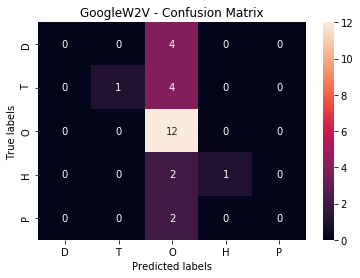

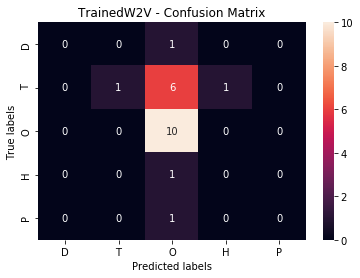

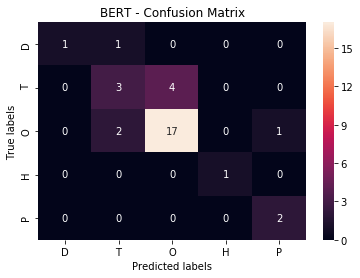

In [17]:
# Confusion Matrix Plot for GloVe
plt.figure(1)
df_cm = pd.read_csv("GloVe/Sally_Trixy_Agree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GloVe - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for GoogleW2V
plt.figure(2)
df_cm = pd.read_csv("GoogleW2V/Sally_Trixy_Agree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GoogleW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for TrainedW2V
plt.figure(3)
df_cm = pd.read_csv("TrainedW2V/Sally_Trixy_Agree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('TrainedW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

# Confusion Matrix Plot for BERT
plt.figure(4)
df_cm = pd.read_csv("BERT/Sally_Trixy_Agree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('BERT - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

## 5. Sally and Frenard Agree

### In this case, we have taken all the usefull sentences labelled by Sally and Frenard, where they agree.

In [18]:
df_sallyfrenard_agree = pd.DataFrame()
df_sallyfrenard_agree = pd.concat([df_sallyfrenard_agree,df_glove.iloc[5:6,:8]])
df_sallyfrenard_agree = pd.concat([df_sallyfrenard_agree,df_google_w2v.iloc[5:6,:8]])
df_sallyfrenard_agree = pd.concat([df_sallyfrenard_agree,df_trained_w2v.iloc[5:6,:8]])
df_sallyfrenard_agree = pd.concat([df_sallyfrenard_agree,df_bert.iloc[5:6,:8]])
df_sallyfrenard_agree['Coder'] = list_models
df_sallyfrenard_agree.rename(columns = {'Coder':'Models'}, inplace = True) 
df_sallyfrenard_agree

,Models,Train_Accuracy,Val_Accuracy,Test_Accuracy,#TestData,#AllData
5,Glove,0.904000,0.666667,0.571429,14,70
5,Google_W2V,0.954717,0.766667,0.727273,11,70
5,Trained_W2V,0.938776,0.866667,0.666667,15,70
5,BERT,NaN,0.666667,0.461538,13,70


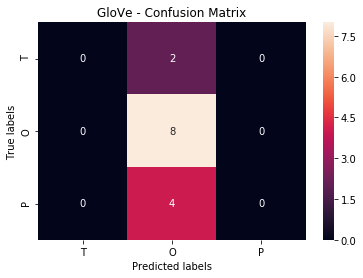

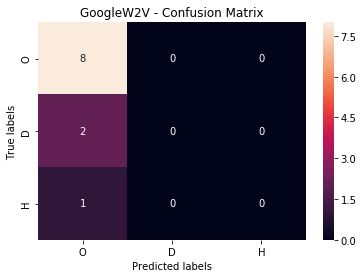

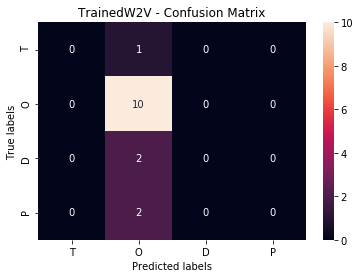

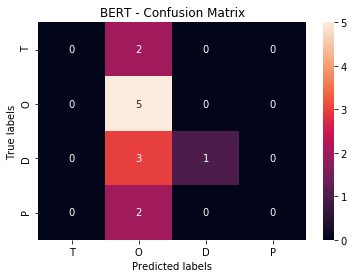

In [19]:
# Confusion Matrix Plot for GloVe
plt.figure(1)
df_cm = pd.read_csv("GloVe/Sally_Frenard_Agree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GloVe - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for GoogleW2V
plt.figure(2)
df_cm = pd.read_csv("GoogleW2V/Sally_Frenard_Agree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GoogleW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for TrainedW2V
plt.figure(3)
df_cm = pd.read_csv("TrainedW2V/Sally_Frenard_Agree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('TrainedW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

# Confusion Matrix Plot for BERT
plt.figure(4)
df_cm = pd.read_csv("BERT/Sally_Frenard_Agree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('BERT - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

## 6. Sally and Trixy Disgree

### In this case, we have taken all the usefull sentences labelled by Sally, where Sally and Trixy disagree.

In [20]:
df_sallytrixy_disagree = pd.DataFrame()
df_sallytrixy_disagree = pd.concat([df_sallytrixy_disagree,df_glove.iloc[6:7,:8]])
df_sallytrixy_disagree = pd.concat([df_sallytrixy_disagree,df_google_w2v.iloc[6:7,:8]])
df_sallytrixy_disagree = pd.concat([df_sallytrixy_disagree,df_trained_w2v.iloc[6:7,:8]])
df_sallytrixy_disagree = pd.concat([df_sallytrixy_disagree,df_bert.iloc[6:7,:8]])
df_sallytrixy_disagree['Coder'] = list_models
df_sallytrixy_disagree.rename(columns = {'Coder':'Models'}, inplace = True) 
df_sallytrixy_disagree

,Models,Train_Accuracy,Val_Accuracy,Test_Accuracy,#TestData,#AllData
6,Glove,0.958333,0.571429,0.764706,17,84
6,Google_W2V,1.000000,0.714286,0.611111,18,84
6,Trained_W2V,0.989071,0.809524,0.937500,16,84
6,BERT,NaN,0.769231,0.900000,20,84


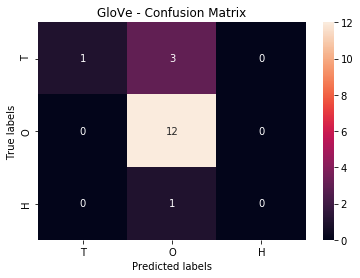

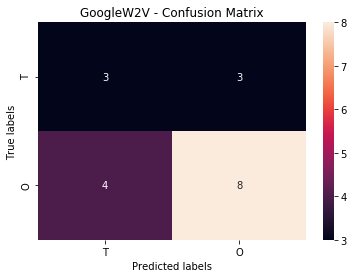

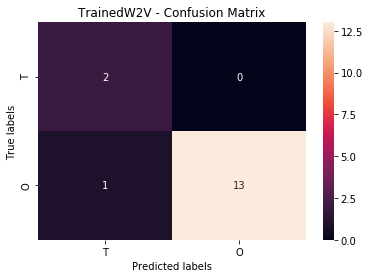

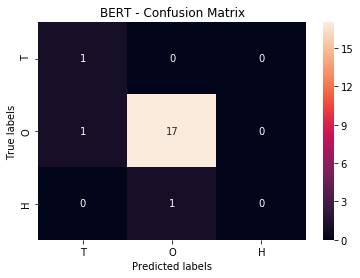

In [21]:
# Confusion Matrix Plot for GloVe
plt.figure(1)
df_cm = pd.read_csv("GloVe/Sally_Trixy_DisAgree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GloVe - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for GoogleW2V
plt.figure(2)
df_cm = pd.read_csv("GoogleW2V/Sally_Trixy_DisAgree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GoogleW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for TrainedW2V
plt.figure(3)
df_cm = pd.read_csv("TrainedW2V/Sally_Trixy_DisAgree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('TrainedW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

# Confusion Matrix Plot for BERT
plt.figure(4)
df_cm = pd.read_csv("BERT/Sally_Trixy_DisAgree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('BERT - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

## 7. Sally and Frenard Disgree

### In this case, we have taken all the usefull sentences labelled by Sally, where Sally and Frenard disagree.

In [22]:
df_sallyfrenard_disagree = pd.DataFrame()
df_sallyfrenard_disagree = pd.concat([df_sallyfrenard_disagree,df_glove.iloc[7:8,:8]])
df_sallyfrenard_disagree = pd.concat([df_sallyfrenard_disagree,df_google_w2v.iloc[7:8,:8]])
df_sallyfrenard_disagree = pd.concat([df_sallyfrenard_disagree,df_trained_w2v.iloc[7:8,:8]])
df_sallyfrenard_disagree = pd.concat([df_sallyfrenard_disagree,df_bert.iloc[7:8,:8]])
df_sallyfrenard_disagree['Coder'] = list_models
df_sallyfrenard_disagree.rename(columns = {'Coder':'Models'}, inplace = True) 
df_sallyfrenard_disagree

,Models,Train_Accuracy,Val_Accuracy,Test_Accuracy,#TestData,#AllData
7,Glove,0.896739,0.916667,0.800000,10,62
7,Google_W2V,0.958333,0.950000,0.866667,15,62
7,Trained_W2V,0.988889,0.800000,0.750000,12,62
7,BERT,NaN,0.900000,0.857143,14,62


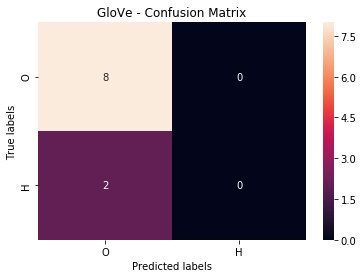

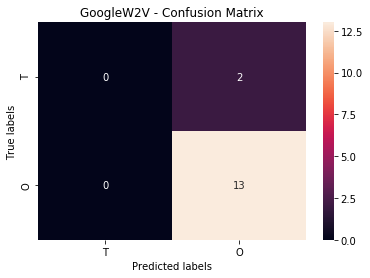

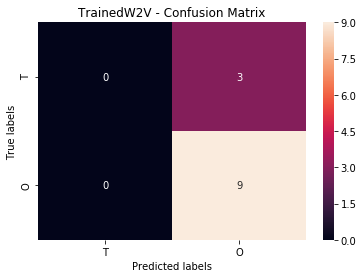

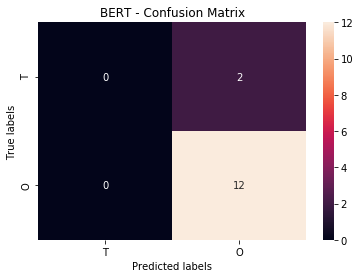

In [23]:
# Confusion Matrix Plot for GloVe
plt.figure(1)
df_cm = pd.read_csv("GloVe/Sally_Frenard_DisAgree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GloVe - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for GoogleW2V
plt.figure(2)
df_cm = pd.read_csv("GoogleW2V/Sally_Frenard_DisAgree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GoogleW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for TrainedW2V
plt.figure(3)
df_cm = pd.read_csv("TrainedW2V/Sally_Frenard_DisAgree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('TrainedW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

# Confusion Matrix Plot for BERT
plt.figure(4)
df_cm = pd.read_csv("BERT/Sally_Frenard_DisAgree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('BERT - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

## 8. Trixy and Sally Disagree

### In this case, we have taken all the usefull sentences labelled by Trixy, where Sally and Trixy disagree.

In [24]:
df_trixysally_disagree = pd.DataFrame()
df_trixysally_disagree = pd.concat([df_trixysally_disagree,df_glove.iloc[8:9,:8]])
df_trixysally_disagree = pd.concat([df_trixysally_disagree,df_google_w2v.iloc[8:9,:8]])
df_trixysally_disagree = pd.concat([df_trixysally_disagree,df_trained_w2v.iloc[8:9,:8]])
df_trixysally_disagree = pd.concat([df_trixysally_disagree,df_bert.iloc[8:9,:8]])
df_trixysally_disagree['Coder'] = list_models
df_trixysally_disagree.rename(columns = {'Coder':'Models'}, inplace = True) 
df_trixysally_disagree

,Models,Train_Accuracy,Val_Accuracy,Test_Accuracy,#TestData,#AllData
8,Glove,0.852525,0.800000,0.375000,24,134
8,Google_W2V,0.934043,0.800000,0.655172,29,134
8,Trained_W2V,0.954000,0.833333,0.409091,22,134
8,BERT,NaN,0.571429,0.531250,32,134


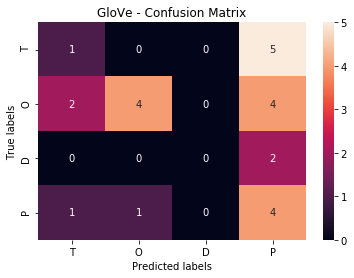

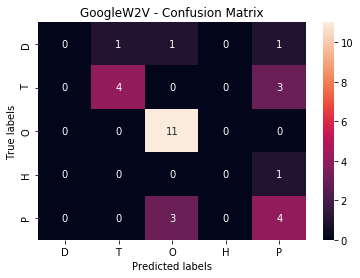

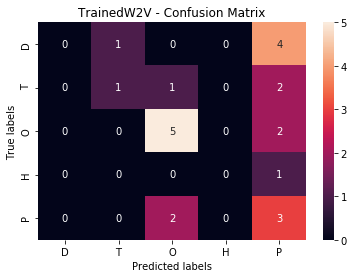

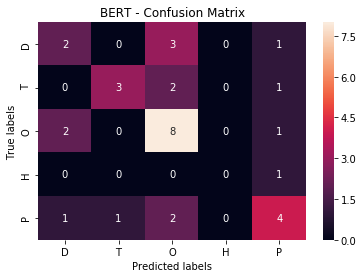

In [25]:
# Confusion Matrix Plot for GloVe
plt.figure(1)
df_cm = pd.read_csv("GloVe/Trixy_Sally_DisAgree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GloVe - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for GoogleW2V
plt.figure(2)
df_cm = pd.read_csv("GoogleW2V/Trixy_Sally_DisAgree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GoogleW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for TrainedW2V
plt.figure(3)
df_cm = pd.read_csv("TrainedW2V/Trixy_Sally_DisAgree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('TrainedW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

# Confusion Matrix Plot for BERT
plt.figure(4)
df_cm = pd.read_csv("BERT/Trixy_Sally_DisAgree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('BERT - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

## 9. Frenard and Sally Disagree

### In this case, we have taken all the usefull sentences labelled by Frenard, where Sally and Frenard disagree.

In [26]:
df_frenardsally_disagree = pd.DataFrame()
df_frenardsally_disagree = pd.concat([df_frenardsally_disagree,df_glove.iloc[9:10,:8]])
df_frenardsally_disagree = pd.concat([df_frenardsally_disagree,df_google_w2v.iloc[9:10,:8]])
df_frenardsally_disagree = pd.concat([df_frenardsally_disagree,df_trained_w2v.iloc[9:10,:8]])
df_frenardsally_disagree = pd.concat([df_frenardsally_disagree,df_bert.iloc[9:10,:8]])
df_frenardsally_disagree['Coder'] = list_models
df_frenardsally_disagree.rename(columns = {'Coder':'Models'}, inplace = True) 

df_frenardsally_disagree

,Models,Train_Accuracy,Val_Accuracy,Test_Accuracy,#TestData,#AllData
9,Glove,0.883673,0.818182,0.500000,24,133
9,Google_W2V,0.894737,0.836364,0.296296,27,133
9,Trained_W2V,0.943158,0.800000,0.185185,27,133
9,BERT,NaN,0.363636,0.541667,24,133


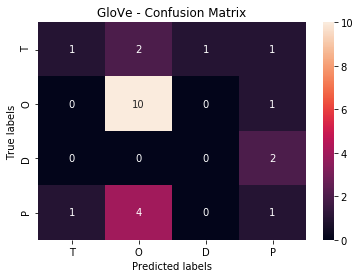

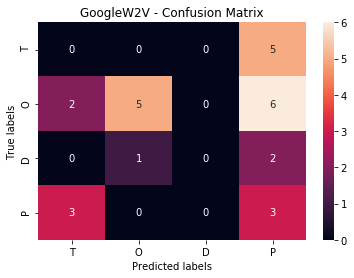

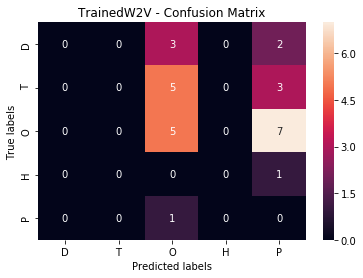

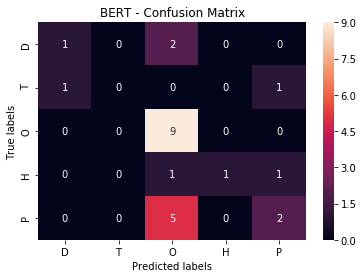

In [27]:
# Confusion Matrix Plot for GloVe
plt.figure(1)
df_cm = pd.read_csv("GloVe/Frenard_Sally_DisAgree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GloVe - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for GoogleW2V
plt.figure(2)
df_cm = pd.read_csv("GoogleW2V/Frenard_Sally_DisAgree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('GoogleW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Confusion Matrix Plot for TrainedW2V
plt.figure(3)
df_cm = pd.read_csv("TrainedW2V/Frenard_Sally_DisAgree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('TrainedW2V - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

# Confusion Matrix Plot for BERT
plt.figure(4)
df_cm = pd.read_csv("BERT/Frenard_Sally_DisAgree.csv")
labels = list(set(df_cm['Y']))
cm = confusion_matrix(df_cm['Y'], df_cm['Predicted_Values'], labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('BERT - Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()